<a href="https://colab.research.google.com/github/Abdulmathin-shaik/Kaggle/blob/main/Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505195 sha256=bdedaf98608f80f8f36f100fdd50bc49d389ae7137e118d453fe1da9405eafa4
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, KNNBasic
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate

In [ ]:
data = Dataset.load_builtin('ml-100k')


Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
data.raw_ratings[10]

('62', '257', 2.0, '879372434')

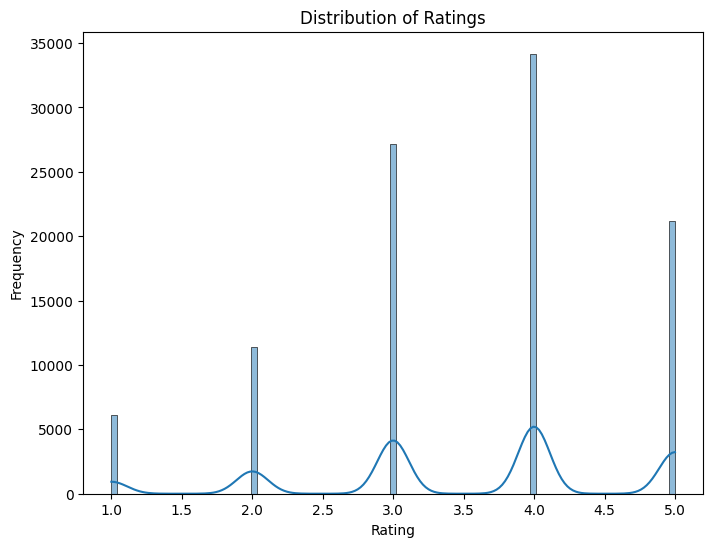

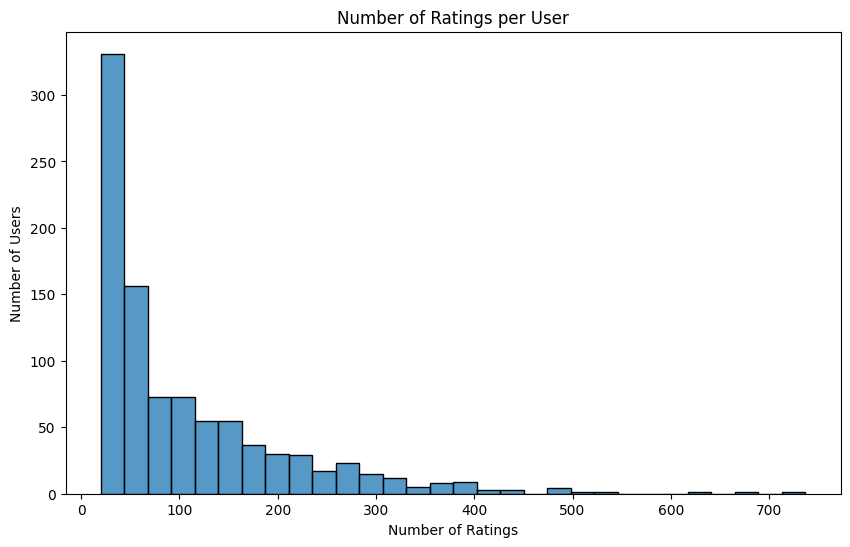

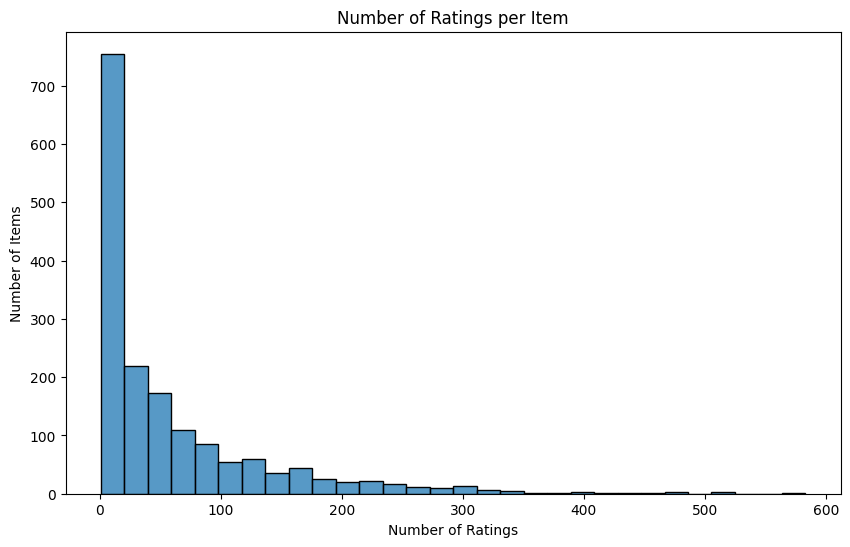

In [ ]:
# prompt: visualize dataset

# Assuming 'ratings' DataFrame exists from previous code (e.g., after loading data)
ratings_df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
ratings_df.drop('timestamp', axis=1, inplace=True)

# Visualize ratings distribution
plt.figure(figsize=(8, 6))
sns.histplot(ratings_df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Visualize number of ratings per user
user_ratings = ratings_df.groupby('user')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings, bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


# Visualize number of ratings per item
item_ratings = ratings_df.groupby('item')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(item_ratings, bins=30)
plt.title('Number of Ratings per Item')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Items')
plt.show()


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)


In [ ]:
model = SVD()
model.fit(trainset)

In [ ]:
predictions = model.test(testset)

In [ ]:
rmse(predictions)

RMSE: 0.9315


0.9315206813476317

In [ ]:
# User-based collaborative filtering
sim_options = {
    "name": "cosine",
    "user_based": True,  # User-based CF
}

In [ ]:
knn = KNNBasic(sim_options=sim_options)

# Train & Predict
knn.fit(trainset)
predictions_knn = knn.test(testset)

# Evaluate
rmse(predictions_knn)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0139


1.0139448691535988

In [ ]:
# prompt: using SVD  mocel build simple prediction

# Predict rating for a specific user and item
user_id = '196'
item_id = '302'
prediction = model.predict(user_id, item_id)
print(prediction)

# Access predicted rating
predicted_rating = prediction.est
print(f"Predicted rating for user {user_id} and item {item_id}: {predicted_rating}")


user: 196        item: 302        r_ui = None   est = 4.06   {'was_impossible': False}
Predicted rating for user 196 and item 302: 4.057556490828447


In [ ]:
def get_top_n_recommendations(predictions, n=5):
    from collections import defaultdict
    top_n = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort & pick top N recommendations
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Get recommendations
top_n_recommendations = get_top_n_recommendations(predictions)

# Show recommendations for a user
user_id = '200'  # Example user from MovieLens
print(top_n_recommendations[user_id])


[('228', 4.957776760121051), ('69', 4.9128406830704865), ('50', 4.789264783225791), ('191', 4.784361536772628), ('215', 4.703586251312528)]


Scikit learn simple KNN


In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


In [3]:
newsgroups = fetch_20newsgroups(subset='all')


In [6]:
newsgroups.data[10]

"From: sandvik@newton.apple.com (Kent Sandvik)\nSubject: Re: 14 Apr 93   God's Promise in 1 John 1: 7\nOrganization: Cookamunga Tourist Bureau\nLines: 17\n\nIn article <1qknu0INNbhv@shelley.u.washington.edu>, > Christian:  washed in\nthe blood of the lamb.\n> Mithraist:  washed in the blood of the bull.\n> \n> If anyone in .netland is in the process of devising a new religion,\n> do not use the lamb or the bull, because they have already been\n> reserved.  Please choose another animal, preferably one not\n> on the Endangered Species List.  \n\nThis will be a hard task, because most cultures used most animals\nfor blood sacrifices. It has to be something related to our current\npost-modernism state. Hmm, what about used computers?\n\nCheers,\nKent\n---\nsandvik@newton.apple.com. ALink: KSAND -- Private activities on the net.\n"

In [9]:
newsgroups.target[10]

19

In [10]:
newsgroups.target_names[newsgroups.target[10]]

'talk.religion.misc'

In [11]:
X = newsgroups.data
y = newsgroups.target

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

In [15]:
X_tfidf[10]

<1x173451 sparse matrix of type '<class 'numpy.float64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(X_test)

In [20]:
y_pred[0]

9

In [22]:
from sklearn.metrics import classification_report

In [23]:
# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.85      0.80       151
           comp.graphics       0.60      0.75      0.67       202
 comp.os.ms-windows.misc       0.67      0.77      0.71       195
comp.sys.ibm.pc.hardware       0.65      0.66      0.65       183
   comp.sys.mac.hardware       0.74      0.73      0.74       205
          comp.windows.x       0.85      0.68      0.76       215
            misc.forsale       0.73      0.56      0.63       193
               rec.autos       0.83      0.83      0.83       196
         rec.motorcycles       0.83      0.91      0.87       168
      rec.sport.baseball       0.87      0.88      0.88       211
        rec.sport.hockey       0.87      0.93      0.90       198
               sci.crypt       0.93      0.92      0.93       201
         sci.electronics       0.83      0.68      0.75       202
                 sci.med       0.88      0.81      

In [24]:
# prompt: For the same model use random forest model

from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code) ...

# Use RandomForestClassifier instead of KNeighborsClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=newsgroups.target_names))


Random Forest Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.85      0.86       151
           comp.graphics       0.72      0.81      0.76       202
 comp.os.ms-windows.misc       0.71      0.88      0.79       195
comp.sys.ibm.pc.hardware       0.67      0.64      0.66       183
   comp.sys.mac.hardware       0.87      0.85      0.86       205
          comp.windows.x       0.91      0.83      0.87       215
            misc.forsale       0.76      0.81      0.79       193
               rec.autos       0.87      0.92      0.90       196
         rec.motorcycles       0.95      0.93      0.94       168
      rec.sport.baseball       0.94      0.92      0.93       211
        rec.sport.hockey       0.92      0.98      0.95       198
               sci.crypt       0.95      0.96      0.95       201
         sci.electronics       0.88      0.67      0.76       202
                 sci.med       0.91  